## Class Project: Climate Change Indicators and the Rise of Global Surface Temperatures

## Introduction 

My goal is to gain insights into how the Earth's surface temperature has fluctuated over the years, with a particular focus on focusing on how temperatures have changed within a multitude of countries. My project seeks to address several key questions, such as:

- How has the global average surface temperature evolved over time and across decades? Are there any noticeable trends or patterns evident in the temperature fluctuations?

- Which countries have undergone the most significant shifts in surface temperature since the data set's inception? Conversely, which countries have undergone the most minimal changes in surface temperature over the same period of time?

These questions are important because gaining insights into the change in global surface temperatures serves as a critical indicator of climate change with profound implications across multiple domains. For instance, it serves as a key metric for understanding the extent and pace of climate change, guiding policy decisions, and informing adaptation strategies in the near future. Temperature fluctuations impact ecosystems, weather patterns, and human health, leading to shifts in biodiversity, extreme weather events, and heightened risks to human well-being. Socially and economically, temperature changes affect agriculture, water resources, energy demand, and infrastructure resilience, necessitating proactive measures to mitigate risks. Scientifically, monitoring global temperature trends enhances our understanding of Earth's climate system and supports climate modeling efforts to anticipate future scenarios. Overall, the study of global surface temperatures is integral to addressing the complex challenges passed by climate change and safeguarding the planet for future generations.

I got this data from Kaggle: https://www.kaggle.com/datasets/tarunrm09/climate-change-indicators/data
The data contains information about climate change indicators for different countries around the world from 1961 to 2022.

In March 2024, Abdulkerim Nese conducted a short analysis with this data and generated four visualizations displaying climate trends over time, in this blog post: https://medium.com/@a.kerimnese/climate-change-dashboard-visualizing-climate-trends-over-time-0413d9f9a8f0

## Data wrangling: change the subtitle here to be more descriptive of what you are doing in this section


Briefly discuss how you got the data into shape for your analyses. You can include some code here, although extensive data cleaning code should be put in an appendix at the end of the document. 



In [22]:
# Show the analyses you did here

# Breaking this up to multiple cells with multiple descriptions of what you did is a good idea

import YData
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


## Visualizing The Data: Global Average Temperature Change

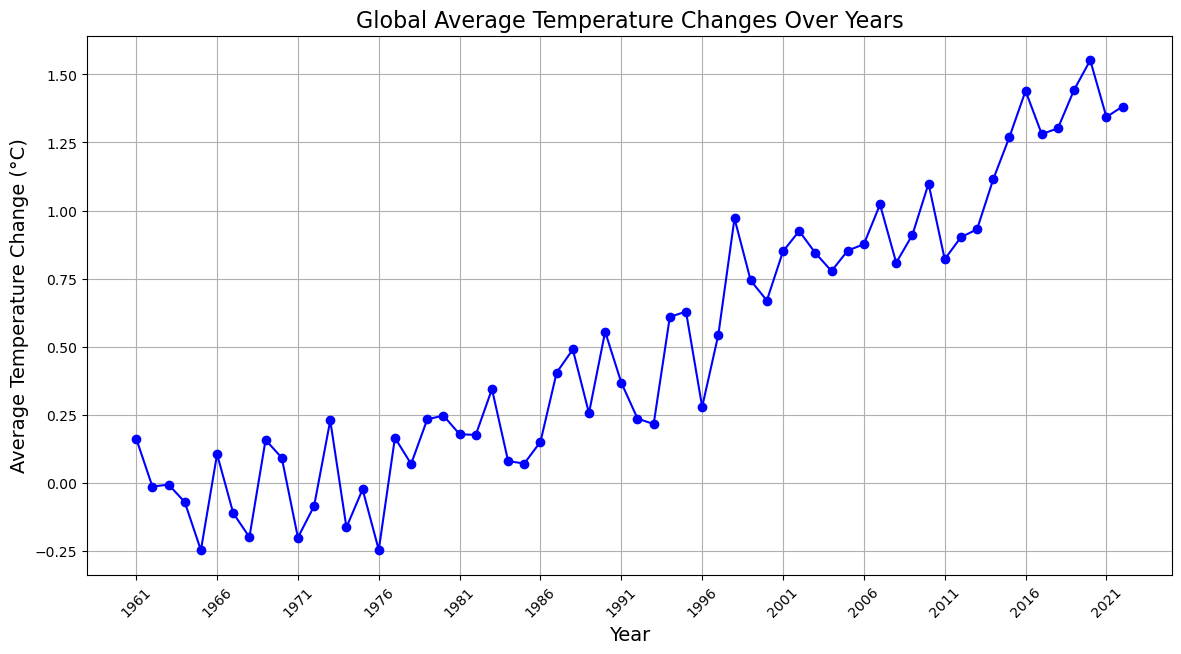

In [23]:
each_year = [col for col in df.columns if col.startswith(('1', '2'))]
global_average_temp_change = df[each_year].mean()

plt.figure(figsize = (14, 7))
plt.plot(years, global_average_temp_change, marker = 'o', color = 'blue', linestyle = '-')
plt.title('Global Average Temperature Changes Over Years', fontsize = 16)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Average Temperature Change (°C)', fontsize = 14)
plt.xticks(years[::5], rotation = 45)
plt.grid(True)
plt.show()

The provided code generates a time series line plot illustrating the global average temperature changes from 1961 to 2022. Each data point on the plot represents the average temperature change for a specific year, derived from the data. By selecting columns corresponding to years beginning with "1" or "2", the code ensures that the analysis spans the entire time period provided to us. The resulting plot offers a visual depiction of the trend in global temperature variations over time. The upward or downward trajectory of the line indicates whether the average temperature has increased or decreased over the years. By examining the slope and fluctuations of the line, observers can discern patterns and trends in global temperature change, gaining insights into the overarching question of how Earth's climate has evolved over the years. This visualization facilitates a clearer understanding of the magnitude and direction of temperature shifts, aiding in the assessment of long-term climate trends and informing discussion on climate change mitigation and adaptation strategies.

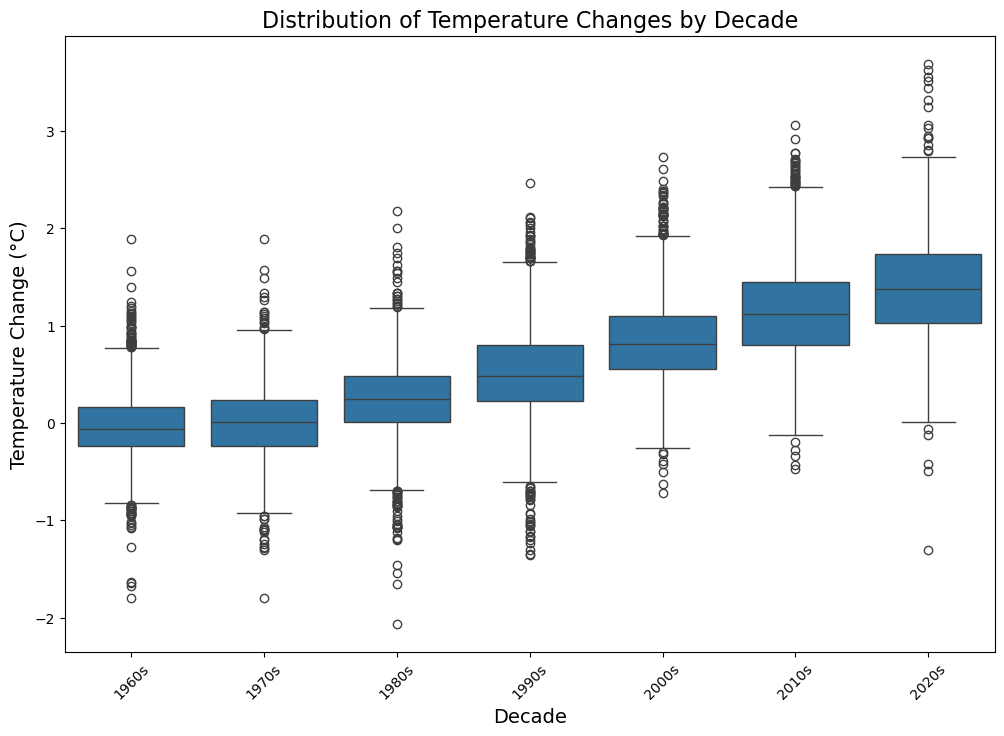

In [24]:
decade_data = pd.melt(df, id_vars = ['Country'], value_vars = years, var_name = 'Year', value_name = 'TempChange')
decade_data['Decade'] = decade_data['Year'].apply(lambda x: x[0:3] + '0s')  # Group years into decades

# Creating the box plot
plt.figure(figsize = (12, 8))
sns.boxplot(x = 'Decade', y = 'TempChange', data = decade_data)
plt.title('Distribution of Temperature Changes by Decade', fontsize = 16)
plt.xlabel('Decade', fontsize = 14)
plt.ylabel('Temperature Change (°C)', fontsize = 14)
plt.xticks(rotation = 45)
plt.show()

The provided code generates a box plot illustrating the distribution of temperature changes across different decades. Each box plot in the plot corresponds to a different decade, such as the 1960s, 1970s, and so on, while the vertical axis displays the temperature change in degrees Celcius. The central line within each box plot represents the median temperature change for that decade, providing insight into the typical magnitude of temperature shifts during that period. The box plot visually represents the distribution of temperature changes across decades, with each box indicating the interquartile range of temperature variability within a decade. The whiskers extend to show the range of typical temperature fluctuations, while the outliers highlight exceptional temperature events of anomalies.

This visualization enables observers to discern patterns and trends in temperature variability across decades. By comparing positions and spreads of the boxes between different decades, viewers can identify periods of relatively stable temperatures as well as periods characterized by greater variability or extreme temperature shifts. Overall, the box plot offers valuable insight into the historical trends and variability of temperature changes over time, aiding in the assessment of long-term climate patterns and informing discussions on climate change impacts and adaptation strategies.

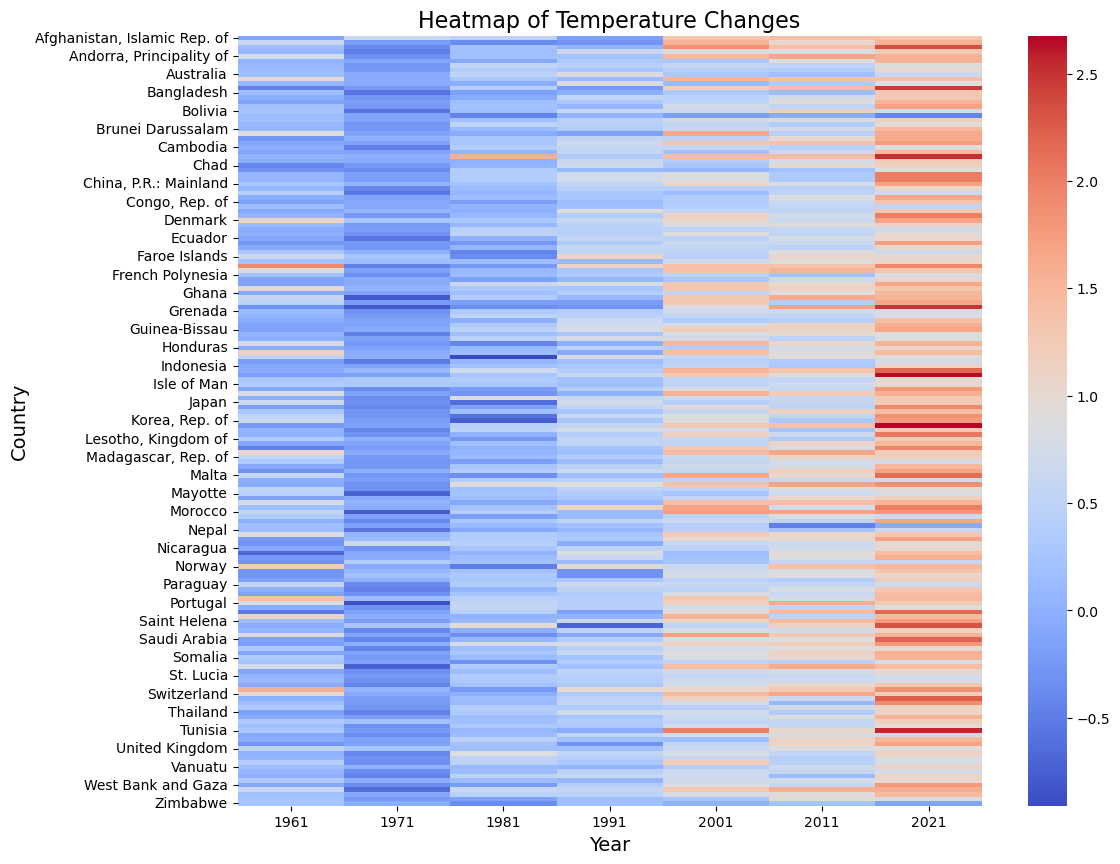

In [25]:
selected_years = ['1961', '1971', '1981', '1991', '2001', '2011', '2021'] # Drop countries with missing values for simplicity
heatmap_data = df.set_index('Country')[selected_years].dropna()

plt.figure(figsize = (12, 10))
sns.heatmap(heatmap_data, cmap = 'coolwarm')
plt.title('Heatmap of Temperature Changes', fontsize = 16)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Country', fontsize = 14)
plt.show()

The provided heatmap visually represents temperature changes across selected years (1961, 1971, 1981, 1991, 2001, 2011, and 2021) for various countries. Each row in the heatmap corresponds to a specific country, while each column represents a year. The color intensity at each intersection reflects the magnitude of temperature change, enabling viewers to discern temperature patterns and trends across countries over the specified years. By observing the variations in color intensity, viewers gain insights into the spatial and temporal distribution of temperature changes, facilitating an understanding of how climate patterns have evolved over the selected time period and across different geographical regions.

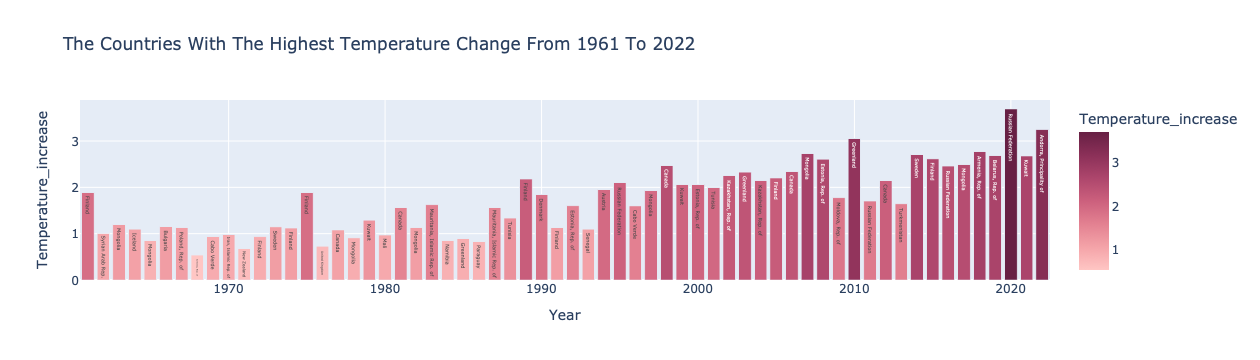

In [30]:
highest_temp_countries = df_melted.groupby("Year").apply(lambda x: x.nlargest(1, "Temperature_increase")).reset_index(drop = True)
fig = px.bar(highest_temp_countries.sort_values("Year", ascending = True), x = 'Year', y = 'Temperature_increase', color = 'Temperature_increase',
              color_continuous_scale = 'burg', title='The Countries With The Highest Temperature Change From 1961 To 2022', text = "Country",
              labels = {'Tempurate_Change': 'Tempuarete Change (°C)'})

fig.update_layout(
    xaxis = dict(showgrid = True),
    yaxis = dict(showgrid = True),
    
)
fig.show()

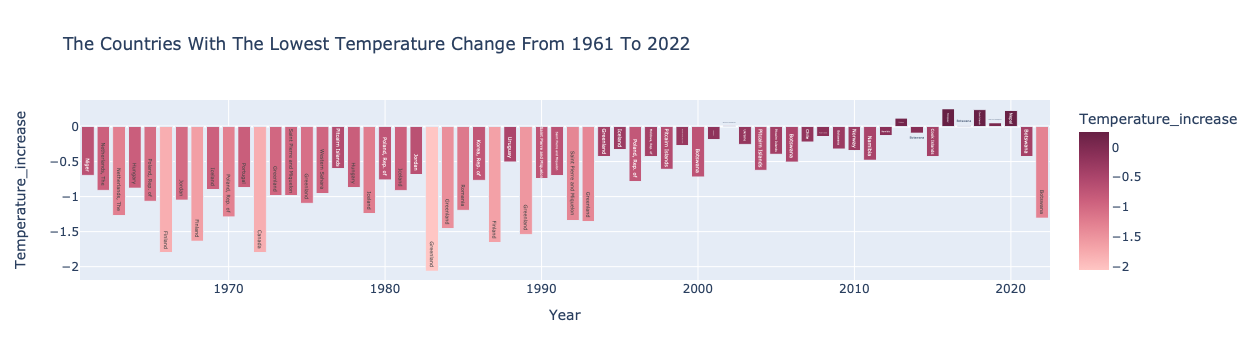

In [27]:
lowest_temp_countries = df_melted.groupby("Year").apply(lambda x: x.nsmallest(1, "Temperature_increase")).reset_index(drop = True)
fig = px.bar(lowest_temp_countries.sort_values("Year", ascending = True), x = 'Year', y = 'Temperature_increase', color = 'Temperature_increase',
              color_continuous_scale = 'burg', title = 'The Countries With The Lowest Temperature Change From 1961 To 2022 ', text = "Country",
              labels = {'Tempurate_Change': 'Tempuarete Cahnge (°C)'})

fig.update_layout(
    xaxis = dict(showgrid = True),
    yaxis = dict(showgrid = True),
    
)
fig.show()

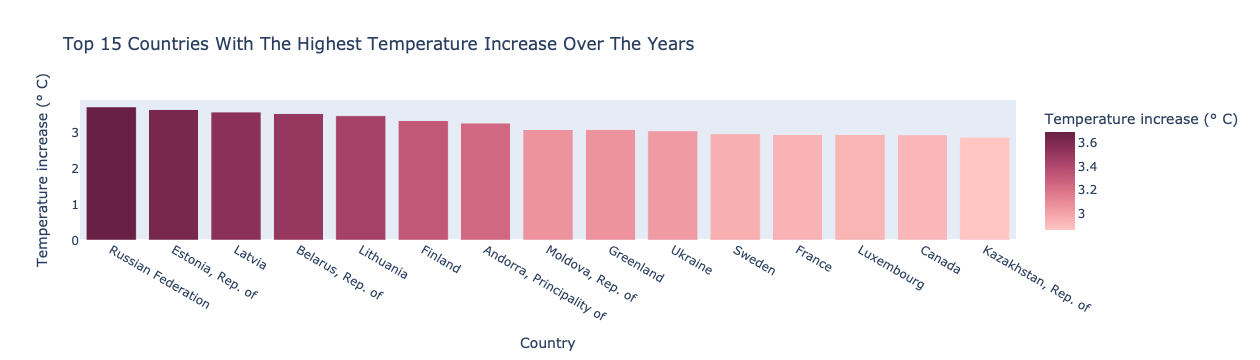

In [28]:
fig_bar = px.bar(df_melted.sort_values("Temperature_increase", ascending = False ).head(15), 
                x = 'Country', y = 'Temperature_increase', color = 'Temperature_increase', 
                color_continuous_scale = 'burg', title = 'Top 15 Countries With The Highest Temperature Increase Over The Years', 
                hover_name = 'Year',
                labels = {'Temperature_increase':'Temperature increase (° C)'})

fig_bar.update_layout(
    xaxis = dict(showgrid = False),
    yaxis = dict(showgrid = False),
   
)

fig_bar.show()

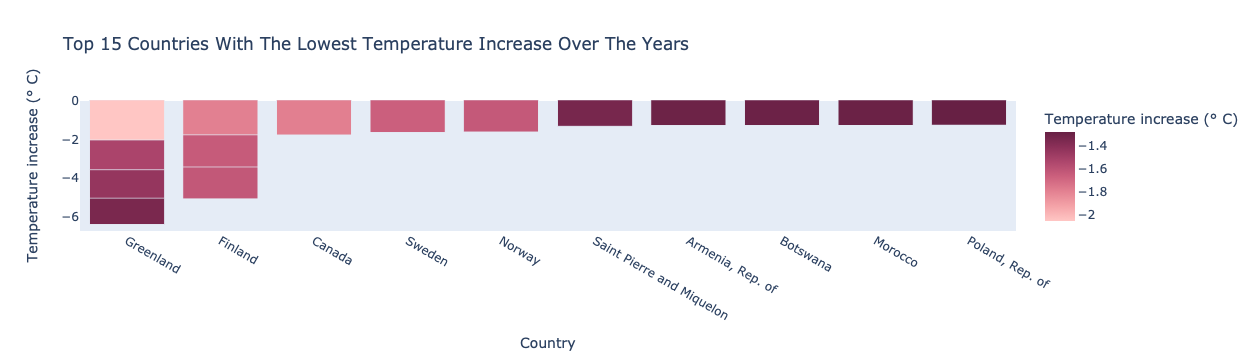

In [29]:
fig_bar = px.bar(df_melted.sort_values("Temperature_increase", ascending = True).head(15), 
                x = 'Country', y = 'Temperature_increase', color = 'Temperature_increase', 
                color_continuous_scale = 'burg', title = 'Top 15 Countries With The Lowest Temperature Increase Over The Years', 
                hover_name = 'Year',
                labels = {'Temperature_increase':'Temperature increase (° C)'})

fig_bar.update_layout(
    xaxis = dict(showgrid = False),
    yaxis = dict(showgrid = False),
   
)

fig_bar.show()

## Analyses: subtitle about the analyses/models you are using 

Include other analyses here, including extracting insights using pandas and also potentially including hypothesis tests and machine learning methods in the final version of your project once we have disucssed these methods in class. 


In [16]:
# Show the analyses you did here

# Breaking this up to multiple cells with multiple descriptions of what you did is a good idea



## Conclusions

Write a few paragraphs summarizing what you found, how the findings address your question of interest, and possible future directions. Please make sure describe your conclusions in an intuitive way, and make sure that your argument is strong and backed by solid evidence from your data. 


## Reflection
  

Write a few paragraphs describing what went well with this project and what was more difficult. Also describe any additional analyses you tried that you did not end up including in this report, and approximately how much time you spend working the project. 

Finally, please go to Canvas and answer a few questions related to how the project went.



## Appendix (optional)

If there is additional code you would like to include (in order to keep your project report 10 pages or less) you can include it here. Additionally, you could create a GitHub page that has all the working code and data for your analyses (this could be beneficial later as well if you want to show this to future employers, etc.).  



In [21]:
# importing necessary libraries
import YData
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# import data set and displaying first 5 rows
df = pd.read_csv("climate_change_indicators.csv")

# to remove the "F" from the year columns
years = []
for i in df.columns:
    if i.startswith('F'):
        year = i[1:]
        df.rename(columns = {i:year}, inplace = True)
        years.append(year)

# melt the dataset into a long format data frame containing all possible combinations of Country, Year, and Temperature
df_melted = pd.melt(df, id_vars = 'Country', value_vars = years, var_name = 'Year', value_name = 'Temperature_increase')
df_melted['Year'] = df_melted['Year'].astype(int)

#to check duplicates
df_duplicates = df_melted.duplicated()
df_duplicates

#check the sum of null values in the Dataset
df_melted.isnull().sum()

#fill the null values in the temperature column with their respective mean temperature
df_melted['Temperature_increase'].fillna(df_melted['Temperature_increase'].mean(),inplace=True)

#recheck the total null values
df_melted.isnull().sum()

#to extract the countries with the highest temperature each year
highest_temp_countries = df_melted.groupby("Year").apply(lambda x: x.nlargest(1, "Temperature_increase")).reset_index(drop=True)